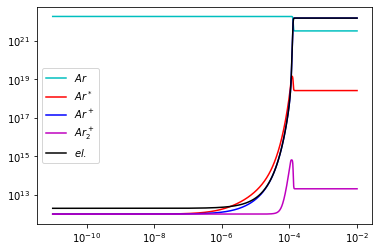

Equilibrium electron density: 1.4899444534440742e+22 1.4899444513831217e+22 20609501580606.207
Ignition time: 0.000128264983052806


In [74]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

p = 1e2
kB = 1.38e-23
kBeV = 8.617e-5
Tg = 400.0
Te = 2

tsteps = 1000
tspan = np.logspace(-11,-2,tsteps)

nArs_init = 1e12
nArp_init = 1e12
nAr2p_init = 1e12
ne_init = nArp_init +  nAr2p_init
initial = [nArs_init, nArp_init, nAr2p_init, ne_init]

def odefun(y,t):
    nArs = y[0]
    nArp = y[1]
    nAr2p = y[2]
    ne = y[3]

    nAr = p/(kB*Tg) - nArs - 0.5*nAr2p - nArp
    k1 = f_k1(Te,Tg)    
    k2 = f_k2(Te,Tg)
    k3 = f_k3(Te,Tg)
    k4 = f_k4(Te,Tg)
    k5 = f_k5(Te,Tg)
    k6 = f_k6(Te,Tg)
    k7 = f_k7(Te,Tg)
    k8 = f_k8(Te,Tg)
    k9 = f_k9(Te,Tg)
    k10 = f_k10(Te,Tg)
    k11 = f_k11(Te,Tg)

    SArs = k1*ne*nAr\
            -k2*ne*nArs\
            -k4*ne*nArs\
            +k6*ne*nAr2p\
            -2*k10*nArs**2\
            -k11*nArs*nAr
    #You need to fill in the correct expressions
    SArp = k3*ne*nAr\
            +k4*ne*nArs\
            -k5*ne**2*nArp\
            +k7*ne*nAr2p\
            -k8*nArp*nAr**2\
            +k9*nArp*nAr\
            +k10*nArs**2
    SAr2p = -k6*ne*nAr2p\
            -k7*ne*nAr2p\
            +k8*nArp*nAr**2\
            -k9*nArp*nAr
    Se = k3*ne*nAr\
            +k4*ne*nArs\
            -k5*ne**2*nArp\
            -k6*ne*nAr2p\
            +k10*nArs**2

    return np.array([SArs,SArp,SAr2p,Se])

#You need to define these functions
def f_k1(Te, Tg):
    return 4.9e-15*Te**(0.5)*np.exp(-11.65/Te)
def f_k2(Te, Tg):
    return 4.8e-16*Te**(0.5)
def f_k3(Te, Tg):
    return 1.27e-14*Te**(0.5)*np.exp(-15.76/Te)
def f_k4(Te, Tg):
    return 1.37e-13*Te**(0.5)*np.exp(-4.11/Te)
def f_k5(Te, Tg):
    return 8.75e-39*Te**(-4.5)
def f_k6(Te, Tg):
    return 1.04e-12*(Te/kBeV/300)**(-0.67)*(1 - np.exp(-418/Tg))/(1 - 0.31*np.exp(-418/Tg))
def f_k7(Te, Tg):
    return 1.11e-12*np.exp(-(2.94-3*(Tg*kBeV-0.026)/(Te)))
def f_k8(Te, Tg):
    return 2.25e-43*(Tg/300)**(-0.4)
def f_k9(Te, Tg):
    return 0.522e-15*np.exp(-1.304/(Tg*kBeV))*Tg**(-1)
def f_k10(Te, Tg):
    return 6.2e-16
def f_k11(Te, Tg):
    return 3.0e-21

y = odeint(odefun,initial,tspan) 

nAr = p/(kB*Tg) - y[:,0]- 0.5*y[:,2]- y[:,1]

plt.loglog(tspan,nAr,'c',basex=10, label=r'$Ar$')
plt.loglog(tspan,y[:,0],'r',basex=10, label=r'$Ar^*$')
plt.loglog(tspan,y[:,1],'b',basex=10, label=r'$Ar^+$')
plt.loglog(tspan,y[:,2],'m',basex=10, label=r'$Ar_2^+$')
plt.loglog(tspan,y[:,3],'k',basex=10, label=r'$el.$')
plt.legend()
plt.show()

ene = y[-1, 3]
print("Equilibrium electron density:", ene, y[-1, 1], y[-1, 2])

def ignition_time(tspan, y):
    ene = y[-1, 3]
    min_i = -1
    for i in range(len(y)):
        if y[i, 3] > 0.5*ene:
            min_i = i
            break
    
    return tspan[min_i]

print("Ignition time:", ignition_time(tspan, y))


(100,)


Text(0, 0.5, '$n [m^{-3}]$')

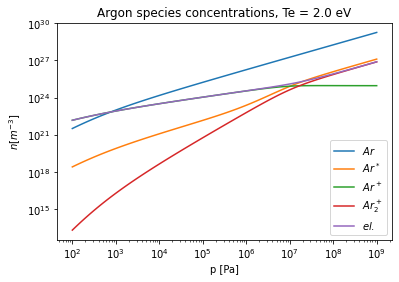

In [83]:
n = []
xs = np.logspace(2, 9, 100)
nArs = []

for p in xs:
    y = odeint(odefun,initial,tspan) 
    nAr = p/(kB*Tg) - y[:,0]- 0.5*y[:,2]- y[:,1]
    n.append(y[-1,:])
    nArs.append(nAr[-1])
    
n = np.array(n)
nArs = np.array(nArs)
print(nArs.shape)

plt.loglog(xs, nArs, label=r"$Ar$")
plt.loglog(xs, n[:,0], label=r'$Ar^*$')
plt.loglog(xs, n[:,1], label=r'$Ar^+$')
plt.loglog(xs, n[:,2], label=r'$Ar_2^+$')
plt.loglog(xs, n[:,3], label=r'$el.$')
# plt.loglog(xs, n[:,4])
plt.legend()
plt.title("Argon species concentrations, Te = 2.0 eV")
plt.xlabel("p [Pa]")
plt.ylabel(r"$n [m^{-3}]$")
